In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
def bic_stats(df):
    print("Inferred BIC better or equal: " + str(len(df[df['bic_inferred'] <= df['bic_true']])))
    print("Inferred BIC worse: " + str(len(df[df['bic_inferred'] > df['bic_true']])))
    
def reticulation_stats(df):
    print("Inferred n_reticulations less: " + str(len(df[df['n_reticulations_inferred'] < df['n_reticulations']])))
    print("Inferred n_reticulations equal: " + str(len(df[df['n_reticulations_inferred'] == df['n_reticulations']])))
    print("Inferred n_reticulations more: " + str(len(df[df['n_reticulations_inferred'] > df['n_reticulations']])))

def weirdness_stats(df):
    df['true_network_weirdness'].plot.hist(bins=10, alpha=0.5, range=(0,1), title='True network weirdness')
    
def zero_branches_stats(df):
    df['near_zero_branches_raxml'].plot.hist(bins=10, alpha=0.5, title='Near-zero branches raxml')
    
def distances(df):
    fig, axes = plt.subplots(3, 2, constrained_layout=True)
    df['hardwired_cluster_distance'].plot.hist(bins=10, alpha=0.5, title='Hardwired cluster distance', ax=axes[0,0])
    df['softwired_cluster_distance'].plot.hist(bins=10, alpha=0.5, title='Softwired cluster distance', ax=axes[0,1])
    df['displayed_trees_distance'].plot.hist(bins=10, alpha=0.5, title='Displayed trees distance', ax=axes[1,0])
    df['tripartition_distance'].plot.hist(bins=10, alpha=0.5, title='Tripartition distance', ax=axes[1,1])
    df['nested_labels_distance'].plot.hist(bins=10, alpha=0.5, title='Nested labels distance', ax=axes[2,0])
    df['path_multiplicity_distance'].plot.hist(bins=10, alpha=0.5, title='Path multiplicity distance', ax=axes[2,1])
    
def build_stats(df):
    plt.figure(0)
    bic_stats(df)
    print("")
    plt.figure(1)
    reticulation_stats(df)
    print("")
    plt.figure(2)
    weirdness_stats(df)
    print("")
    plt.figure(3)
    zero_branches_stats(df)
    print("")
    plt.figure(4)
    distances(df)

Load the result CSV:

In [3]:
#df = pd.read_csv('small_network_results.csv')
df = pd.read_csv('medium_network_norandom_results.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,name,n_taxa,n_trees,n_reticulations,msa_size,sampling_type,simulation_type,celine_params,seqgen_params,near_zero_branches_raxml,n_equal_tree_pairs,true_network_weirdness,true_network_path,inferred_network_path,likelihood_type,brlen_linkage_type,start_type,timeout,n_random_start_networks,n_parsimony_start_networks,runtime_inference,n_reticulations_inferred,bic_true,logl_true,bic_inferred,logl_inferred,bic_raxml,logl_raxml,hardwired_cluster_distance,softwired_cluster_distance,displayed_trees_distance,tripartition_distance,nested_labels_distance,path_multiplicity_distance
0,datasets_medium_network_norandom_0_0/0_22_taxa...,22,4,2,202,PERFECT_SAMPLING,CELINE,{'to': 0.16223186561955155| 'lambda': 21.49262...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,0,0,0,datasets_medium_network_norandom_0_0/0_22_taxa...,datasets_medium_network_norandom_0_0/0_22_taxa...,AVERAGE,LINKED,FROM_RAXML,0,0,0,6334.250,0,3357.579938,-1317.619632,3291.448158,-1318.150983,3291.448158,-1318.150983,7.0,5.0,2.5,9.0,14.0,11.5
1,datasets_medium_network_norandom_0_0/0_22_taxa...,22,4,2,202,PERFECT_SAMPLING,CELINE,{'to': 0.16223186561955155| 'lambda': 21.49262...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,0,0,0,datasets_medium_network_norandom_0_0/0_22_taxa...,datasets_medium_network_norandom_0_0/0_22_taxa...,BEST,LINKED,FROM_RAXML,0,0,0,1150.248,0,3358.780892,-1318.220110,3291.448158,-1318.150983,3291.448158,-1318.150983,7.0,5.0,2.5,9.0,14.0,11.5
2,datasets_medium_network_norandom_0_0/0_22_taxa...,22,4,2,402,PERFECT_SAMPLING,CELINE,{'to': 0.16223186561955155| 'lambda': 21.49262...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,0,0,0,datasets_medium_network_norandom_0_0/0_22_taxa...,datasets_medium_network_norandom_0_0/0_22_taxa...,AVERAGE,LINKED,FROM_RAXML,0,0,0,3626.096,0,6259.305638,-2738.890554,6238.391973,-2764.783699,6238.401624,-2764.788525,7.0,6.0,2.5,9.0,12.0,9.5
3,datasets_medium_network_norandom_0_0/0_22_taxa...,22,4,2,402,PERFECT_SAMPLING,CELINE,{'to': 0.16223186561955155| 'lambda': 21.49262...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,0,0,0,datasets_medium_network_norandom_0_0/0_22_taxa...,datasets_medium_network_norandom_0_0/0_22_taxa...,BEST,LINKED,FROM_RAXML,0,0,0,869.273,0,6260.156175,-2739.315822,6238.391973,-2764.783699,6238.401624,-2764.788525,7.0,6.0,2.5,9.0,12.0,9.5
4,datasets_medium_network_norandom_0_1/0_17_taxa...,17,2,1,101,PERFECT_SAMPLING,CELINE,{'to': 0.10860342742632532| 'lambda': 21.35962...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,4,0,0,datasets_medium_network_norandom_0_1/0_17_taxa...,datasets_medium_network_norandom_0_1/0_17_taxa...,AVERAGE,LINKED,FROM_RAXML,0,0,0,4660.722,1,1171.233082,-384.511527,1162.979859,-380.384915,1165.501221,-396.542264,12.0,14.5,1.5,11.0,14.0,11.5


In [5]:
df.columns

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sampling_type', 'simulation_type', 'celine_params', 'seqgen_params',
       'near_zero_branches_raxml', 'n_equal_tree_pairs',
       'true_network_weirdness', 'true_network_path', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'n_reticulations_inferred', 'bic_true',
       'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml', 'logl_raxml',
       'hardwired_cluster_distance', 'softwired_cluster_distance',
       'displayed_trees_distance', 'tripartition_distance',
       'nested_labels_distance', 'path_multiplicity_distance'],
      dtype='object')

Inferred BIC better or equal: 415
Inferred BIC worse: 45

Inferred n_reticulations less: 413
Inferred n_reticulations equal: 47
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

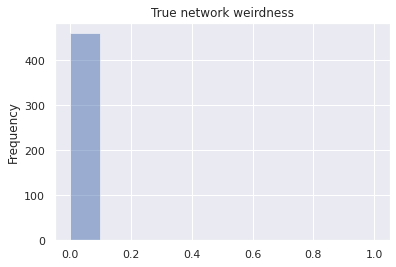

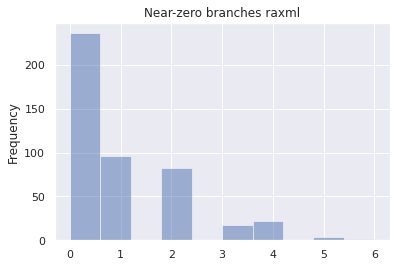

<Figure size 432x288 with 0 Axes>

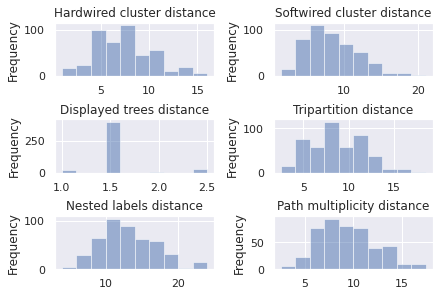

In [6]:
build_stats(df)

# Plots for starting with raxml-ng best tree only

Inferred BIC better or equal: 415
Inferred BIC worse: 45

Inferred n_reticulations less: 413
Inferred n_reticulations equal: 47
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

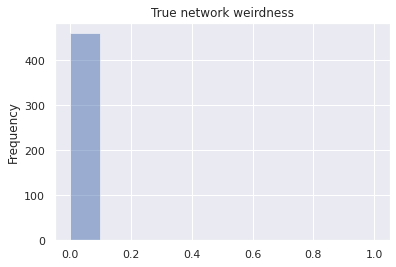

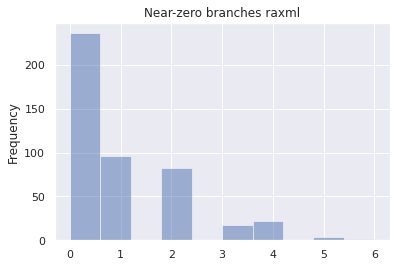

<Figure size 432x288 with 0 Axes>

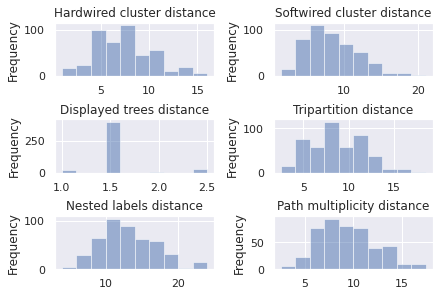

In [7]:
df_raxml_only = df.query('start_type == "FROM_RAXML"')
build_stats(df_raxml_only)

## Plots for MSA_size ~ 100*n_trees

Inferred BIC better or equal: 193
Inferred BIC worse: 9

Inferred n_reticulations less: 182
Inferred n_reticulations equal: 20
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

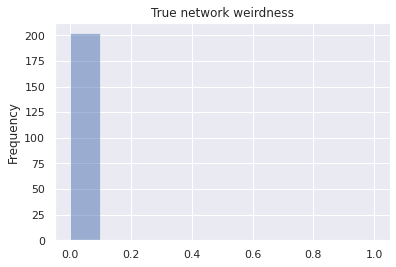

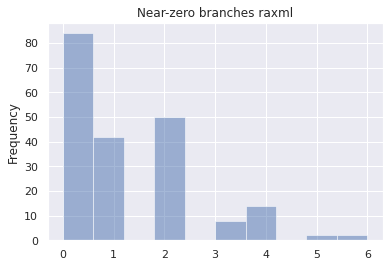

<Figure size 432x288 with 0 Axes>

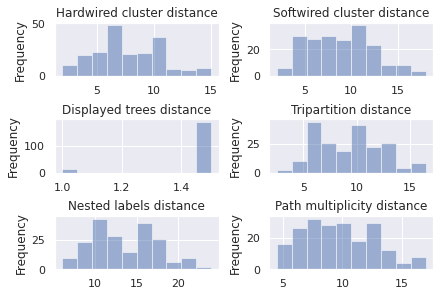

In [8]:
df_raxml_only_msasize_100 = df_raxml_only.query('msa_size == 101')
build_stats(df_raxml_only_msasize_100)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 97
Inferred BIC worse: 4

Inferred n_reticulations less: 91
Inferred n_reticulations equal: 10
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

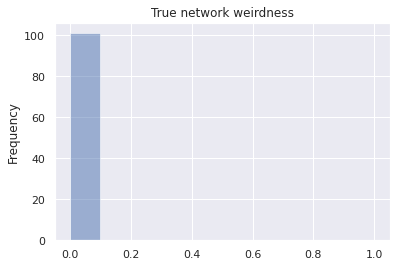

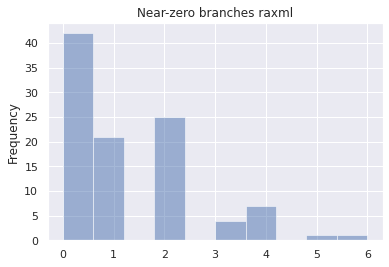

<Figure size 432x288 with 0 Axes>

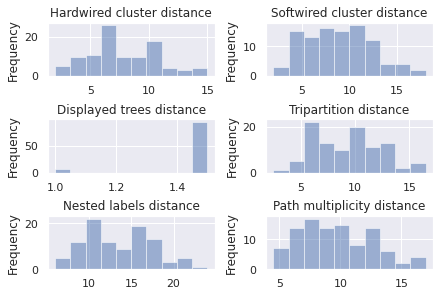

In [9]:
df_raxml_only_msasize_100_average = df_raxml_only_msasize_100.query('likelihood_type == "AVERAGE"')
build_stats(df_raxml_only_msasize_100_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 96
Inferred BIC worse: 5

Inferred n_reticulations less: 91
Inferred n_reticulations equal: 10
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

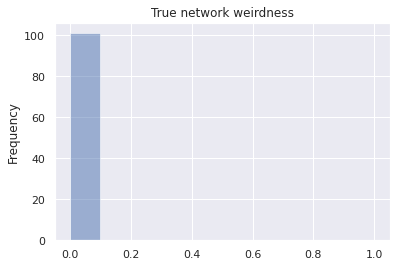

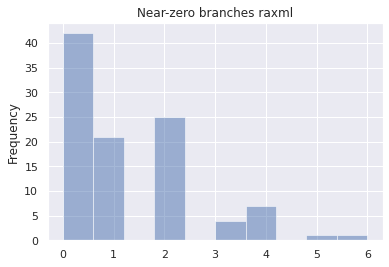

<Figure size 432x288 with 0 Axes>

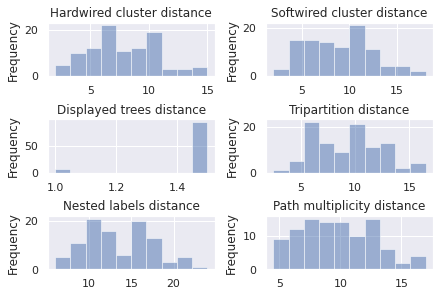

In [10]:
df_raxml_only_msasize_100_best = df_raxml_only_msasize_100.query('likelihood_type == "BEST"')
build_stats(df_raxml_only_msasize_100_best)

## Plots for MSA_size ~ 200*n_trees

Inferred BIC better or equal: 185
Inferred BIC worse: 23

Inferred n_reticulations less: 182
Inferred n_reticulations equal: 26
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

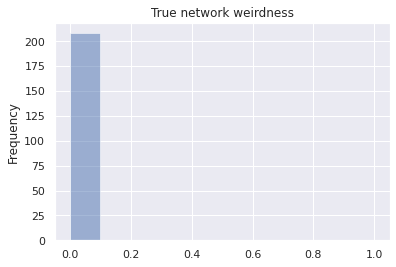

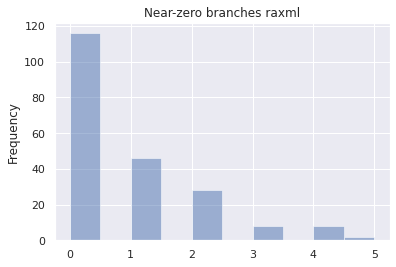

<Figure size 432x288 with 0 Axes>

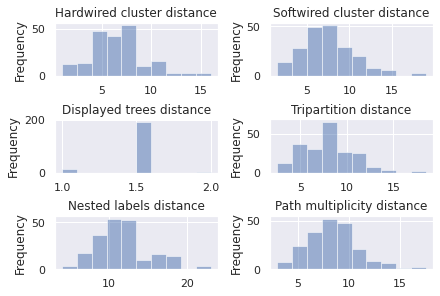

In [11]:
df_raxml_only_msasize_200 = df_raxml_only.query('msa_size == 201')
build_stats(df_raxml_only_msasize_200)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 96
Inferred BIC worse: 8

Inferred n_reticulations less: 88
Inferred n_reticulations equal: 16
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

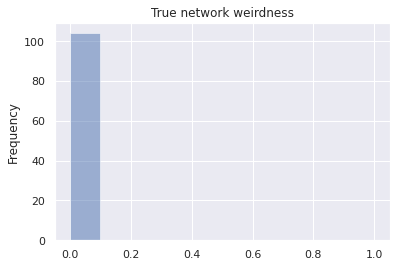

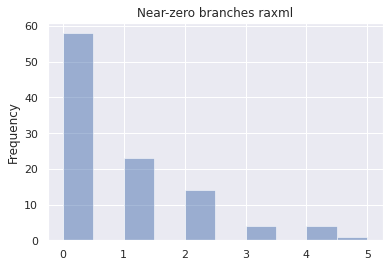

<Figure size 432x288 with 0 Axes>

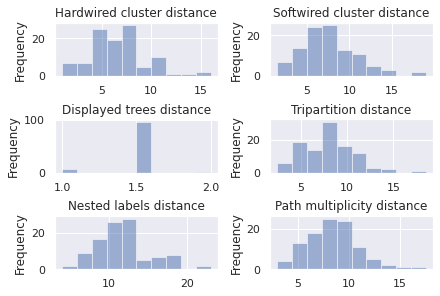

In [12]:
df_raxml_only_msasize_200_average = df_raxml_only_msasize_200.query('likelihood_type == "AVERAGE"')
build_stats(df_raxml_only_msasize_200_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 89
Inferred BIC worse: 15

Inferred n_reticulations less: 94
Inferred n_reticulations equal: 10
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

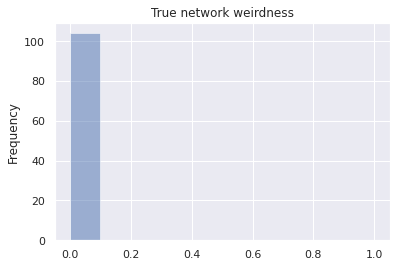

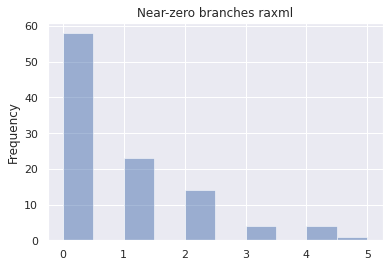

<Figure size 432x288 with 0 Axes>

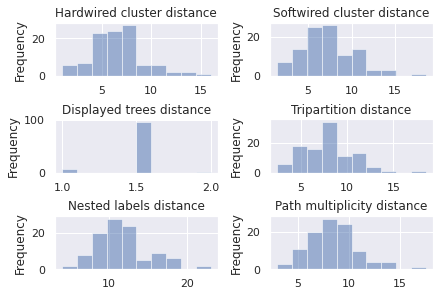

In [13]:
df_raxml_only_msasize_200_best = df_raxml_only_msasize_200.query('likelihood_type == "BEST"')
build_stats(df_raxml_only_msasize_200_best)

# Plots for starting with 5 random, 5 parsimony trees

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

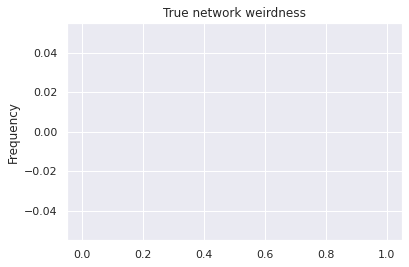

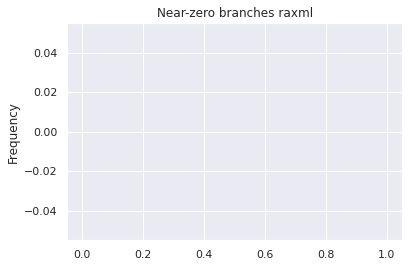

<Figure size 432x288 with 0 Axes>

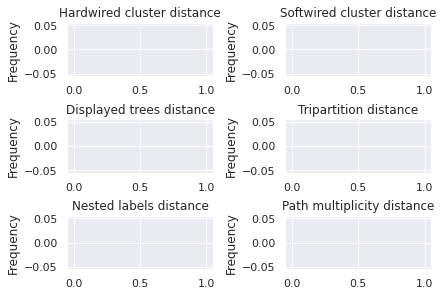

In [14]:
df_random = df.query('start_type == "RANDOM"')
build_stats(df_random)

## Plots for MSA_size ~ 100*n_trees

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

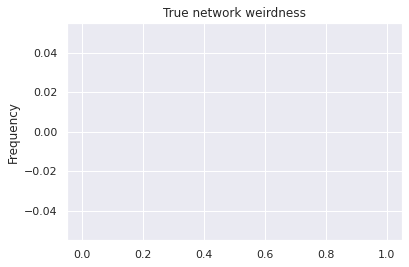

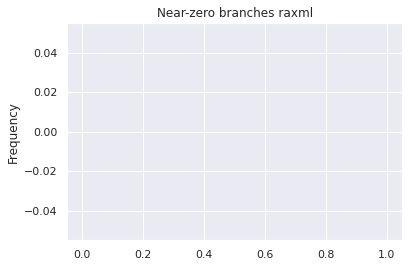

<Figure size 432x288 with 0 Axes>

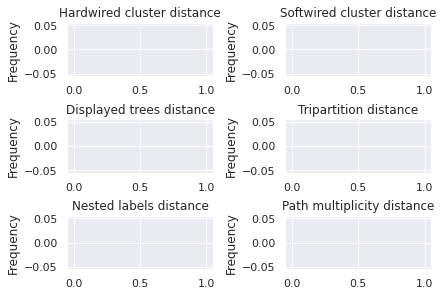

In [15]:
df_random_msasize_100 = df_random.query('msa_size == 101')
build_stats(df_random_msasize_100)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

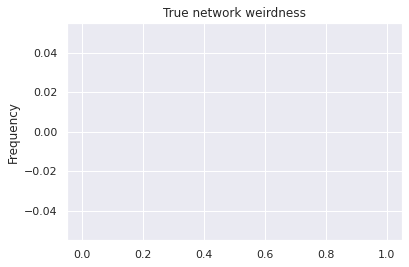

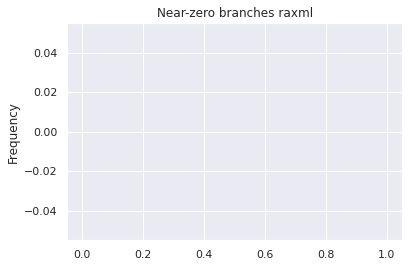

<Figure size 432x288 with 0 Axes>

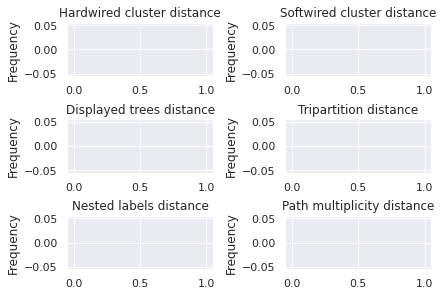

In [16]:
df_random_msasize_100_average = df_random_msasize_100.query('likelihood_type == "AVERAGE"')
build_stats(df_random_msasize_100_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

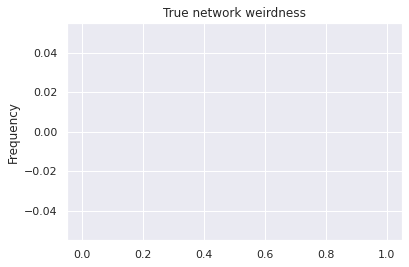

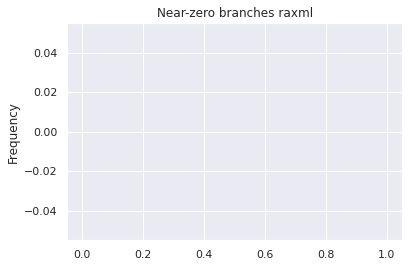

<Figure size 432x288 with 0 Axes>

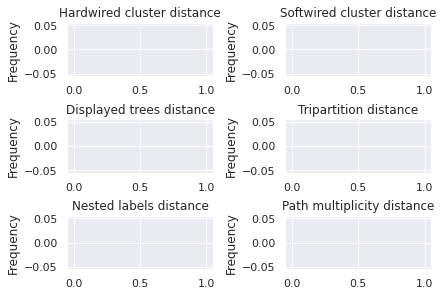

In [17]:
df_random_msasize_100_best = df_random_msasize_100.query('likelihood_type == "BEST"')
build_stats(df_random_msasize_100_best)

## Plots for MSA_size ~ 200*n_trees

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

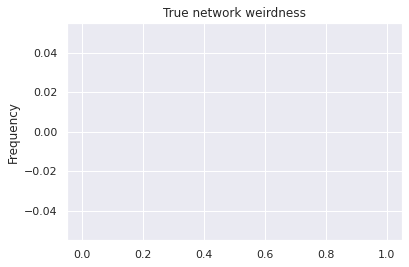

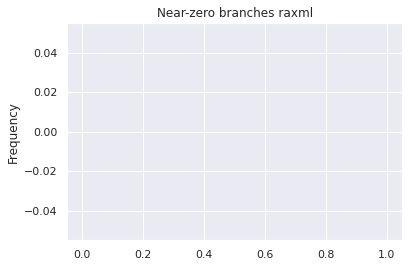

<Figure size 432x288 with 0 Axes>

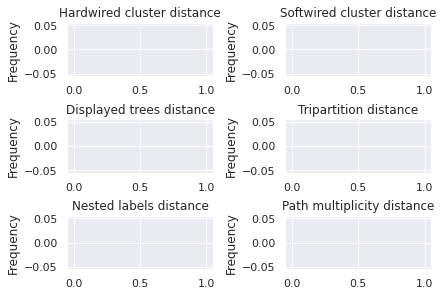

In [18]:
df_random_msasize_200 = df_random.query('msa_size == 201')
build_stats(df_random_msasize_200)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

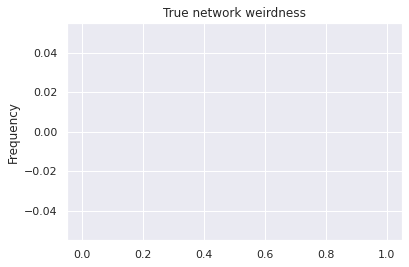

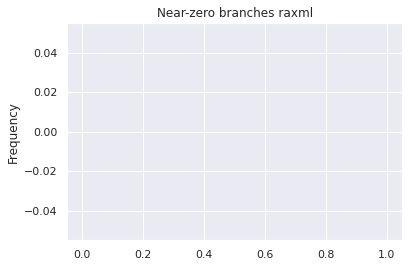

<Figure size 432x288 with 0 Axes>

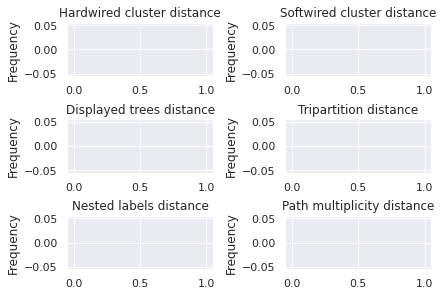

In [19]:
df_random_msasize_200_average = df_random_msasize_200.query('likelihood_type == "AVERAGE"')
build_stats(df_random_msasize_200_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 0
Inferred BIC worse: 0

Inferred n_reticulations less: 0
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

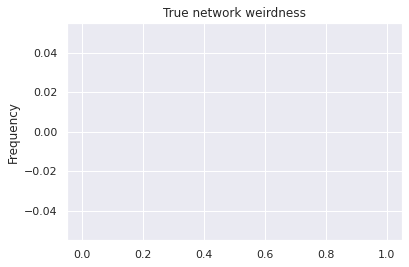

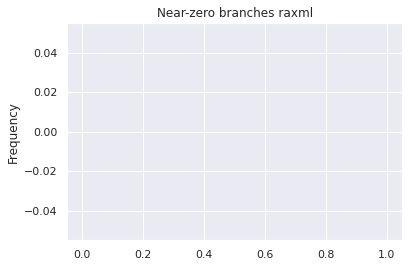

<Figure size 432x288 with 0 Axes>

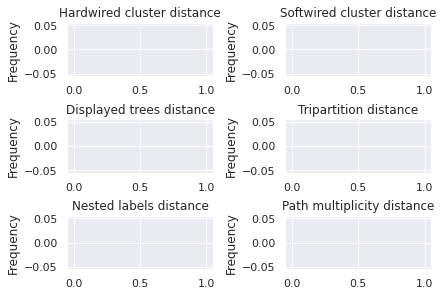

In [20]:
df_random_msasize_200_best = df_random_msasize_200.query('likelihood_type == "BEST"')
build_stats(df_random_msasize_200_best)